# LDA and KNN classification: Problem solving

In this session, you'll work through a complete example using a new dataset, `binary`.

## Load the dataframe

The `binary.csv` dataset contains 4 variables:

- `admit`: the admittance status (0=not admitted, 1=admitted)
- `gre`: the student's GRE score
- `gpa`: the student's GPA
- `rank`: rank of the institution (1=highest to 4=lowest prestige)

Start by importing `pandas`.

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="importAs" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="libraryAlias" id="/%IFN5#t2uAm}E`8:KV:">pd</field></block></xml>

Load a dataframe with `binary.csv` and display the dataframe.

In [2]:
dataframe = pd.read_csv('datasets/binary.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o69xDDO)6.5D2/bJqST?">dataframe</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="11" y="186"><field name="VAR" id="o69xDDO)6.5D2/bJqST?">dataframe</field><value name="VALUE"><block type="varDoMethod" id="ny0sjvqTnn2B]K2za7Li"><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/binary.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="o69xDDO)6.5D2/bJqST?">dataframe</field></block></xml>

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


## Prepare the train/test data

To train the classifiers, you need to split the dataframe into training data and testing data.

Start by creating a dataframe `Y` that just has `admit` in it, and then display `Y` so you can be sure it worked.

In [4]:
Y = dataframe[['admit']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable><variable id="o69xDDO)6.5D2/bJqST?">dataframe</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field><value name="VALUE"><block type="indexer" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="o69xDDO)6.5D2/bJqST?">dataframe</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">admit</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></xml>

,admit
0,0
1,1
2,1
3,1
4,0
...,...
395,0
396,0
397,0
398,0


Next do the same thing for `X` using the other columns in the dataframe.

In [5]:
X = dataframe[['gre', 'gpa', 'rank']]

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="o69xDDO)6.5D2/bJqST?">dataframe</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field><value name="VALUE"><block type="indexer" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="o69xDDO)6.5D2/bJqST?">dataframe</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">gre</field></block></value><value name="ADD1"><block type="text" id="b/mW9(0w,rS.ny;Y(]5A"><field name="TEXT">gpa</field></block></value><value name="ADD2"><block type="text" id="4yc?!4pnBI1/rSBQ41!t"><field name="TEXT">rank</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></xml>

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


To split the data into training and testing data, import `model_selection`.

In [6]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now split the data into training and testing data, using `test_size` at `0.2` so we use 20% of the data for testing.

In [7]:
splits = model_selection.train_test_split(X, Y, test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></value></block></xml>

## Train LDA

First, import `discriminant_analysis`

In [9]:
import sklearn.discriminant_analysis as da

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t#|IDvUc9z_$x]MRbwQb">da</variable></variables><block type="importAs" id=":PRm%S%Z/GaCW^6TfKmk" x="143" y="258"><field name="libraryName">sklearn.discriminant_analysis</field><field name="libraryAlias" id="t#|IDvUc9z_$x]MRbwQb">da</field></block></xml>

Next define the LDA model, e.g. using `create`.

In [10]:
lda = da.LinearDiscriminantAnalysis(n_components=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="U%}a9ac|TF?I@w$@u{j!">lda</variable><variable id="t#|IDvUc9z_$x]MRbwQb">da</variable></variables><block type="variables_set" id="YKGK8q}oHC2L?9R.[4t!" x="-58" y="266"><field name="VAR" id="U%}a9ac|TF?I@w$@u{j!">lda</field><value name="VALUE"><block type="varCreateObject" id="}QuzQLcR5iE|*j7`Cf;6"><field name="VAR" id="t#|IDvUc9z_$x]MRbwQb">da</field><field name="MEMBER">LinearDiscriminantAnalysis</field><data>da:LinearDiscriminantAnalysis</data><value name="INPUT"><block type="lists_create_with" id="Yjx!q**Yny(IJC9]60c#"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="4JrrM7#xYy=;S5F{s5Dk"><field name="CODE">n_components=1</field></block></value></block></value></block></value></block></xml>

Now perform LDA.
Because we need `ravel` to reformat the data for `sklearn`, go ahead and import `numpy`.

In [12]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="importAs" id="6{E|A)Ya_2{hXV^n,QJP" x="16" y="10"><field name="libraryName">numpy</field><field name="libraryAlias" id="Zhzp)s*VL?V@ES3(j:*b">np</field></block></xml>

Train LDA and do the predictions in one cell.
Save the predictions in the variable `ldaPredictions`, and then show the predictions to make sure it worked.

In [16]:
lda.fit(splits[0], np.ravel(splits[2]))

ldaPredictions = lda.predict(splits[1])

ldaPredictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="U%}a9ac|TF?I@w$@u{j!">lda</variable><variable id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="U%}a9ac|TF?I@w$@u{j!">lda</field><field name="MEMBER">fit</field><data>lda:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_set" id="qn$V)Zc+x1,^]#ZWBu0;" x="259" y="295"><field name="VAR" id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</field><value name="VALUE"><block type="varDoMethod" id="rq%)Cuo$S!Rv]]83[(OQ"><field name="VAR" id="U%}a9ac|TF?I@w$@u{j!">lda</field><field name="MEMBER">predict</field><data>lda:predict</data><value name="INPUT"><block type="lists_create_with" id="g!3rY4P1(W4]{2oU]dDb"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="70_kQu*_lQfPL$)[E*]S"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="f8W4Kf.xz`3No$qQ@|16"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="}:Kw6eCPs%6nW8FY_E!N"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="l~QDDPzM@1QK#7dp~N~H" x="264" y="396"><field name="VAR" id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</field></block></xml>

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

You should see a mix of `1` and `0` in the predictions. 

## KNN

First import `neighbors`.

In [17]:
import sklearn.neighbors as neighbors

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</variable></variables><block type="importAs" id="ayw$B{(evWs,ynm/fP%g" x="123" y="313"><field name="libraryName">sklearn.neighbors</field><field name="libraryAlias" id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</field></block></xml>

Next define the KNN model, e.g. using `create`.

In [19]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="DOr#Z1+,_{KG18zR#G)4">knn</variable><variable id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</variable></variables><block type="variables_set" id="`z.|tb|jX$Y2a5;iN{pz" x="-7" y="283"><field name="VAR" id="DOr#Z1+,_{KG18zR#G)4">knn</field><value name="VALUE"><block type="varCreateObject" id="9i7]OHHOnhf2~MjH^n+y"><field name="VAR" id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</field><field name="MEMBER">KNeighborsClassifier</field><data>neighbors:KNeighborsClassifier</data><value name="INPUT"><block type="lists_create_with" id="`.s=9G`sj;R8,?u+OR9Y"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="R*)t!8POzxw3}@cy,{:]"><field name="CODE">n_neighbors=5</field></block></value></block></value></block></value></block></xml>

Now train KNN and do the predictions in one cell.
Save the predictions in the variable `knnPredictions`, and then show the predictions to make sure it worked.

In [20]:
knn.fit(splits[0], np.ravel(splits[2]))

knnPredictions = knn.predict(splits[1])

knnPredictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="DOr#Z1+,_{KG18zR#G)4">knn</variable><variable id="vM0j[9C:2`MqdV2+),oH">knnPredictions</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="DOr#Z1+,_{KG18zR#G)4">knn</field><field name="MEMBER">fit</field><data>knn:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_set" id="qn$V)Zc+x1,^]#ZWBu0;" x="259" y="295"><field name="VAR" id="vM0j[9C:2`MqdV2+),oH">knnPredictions</field><value name="VALUE"><block type="varDoMethod" id="rq%)Cuo$S!Rv]]83[(OQ"><field name="VAR" id="DOr#Z1+,_{KG18zR#G)4">knn</field><field name="MEMBER">predict</field><data>knn:predict</data><value name="INPUT"><block type="lists_create_with" id="g!3rY4P1(W4]{2oU]dDb"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="70_kQu*_lQfPL$)[E*]S"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="f8W4Kf.xz`3No$qQ@|16"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="}:Kw6eCPs%6nW8FY_E!N"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="l~QDDPzM@1QK#7dp~N~H" x="264" y="396"><field name="VAR" id="vM0j[9C:2`MqdV2+),oH">knnPredictions</field></block></xml>

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## Classifier evaluation

To see if the models are any good, do some evaluations.

First import `metrics`.

In [21]:
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable></variables><block type="importAs" id="|1fEPj_#9:@0Qa@y|1F." x="135" y="207"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="C8HQ^p):qDkQA/nhxe{{">metrics</field></block></xml>

### Accuracy

Calculate the LDA accuracy.

In [23]:
metrics.accuracy_score(splits[3], ldaPredictions)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</field></block></value></block></value></block></xml>

0.7375

And calculate the KNN accuracy.

In [25]:
metrics.accuracy_score(splits[3], knnPredictions)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="vM0j[9C:2`MqdV2+),oH">knnPredictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="vM0j[9C:2`MqdV2+),oH">knnPredictions</field></block></value></block></value></block></xml>

0.7125

### Recall/Precision per class

Get the LDA `classification_report`.

In [26]:
print(metrics.classification_report(splits[3], ldaPredictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="Sx0uF}9IfzkucZiyR^1:" x="196" y="360"><value name="TEXT"><shadow type="text" id="a=J{E!^,yE0MlS-rEKnT"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        57
           1       0.58      0.30      0.40        23

    accuracy                           0.74        80
   macro avg       0.67      0.61      0.62        80
weighted avg       0.71      0.74      0.71        80



And get the KNN `classification_report`.

In [28]:
print(metrics.classification_report(splits[3], knnPredictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="vM0j[9C:2`MqdV2+),oH">knnPredictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="Sx0uF}9IfzkucZiyR^1:" x="196" y="360"><value name="TEXT"><shadow type="text" id="a=J{E!^,yE0MlS-rEKnT"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="vM0j[9C:2`MqdV2+),oH">knnPredictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        57
           1       0.50      0.39      0.44        23

    accuracy                           0.71        80
   macro avg       0.64      0.62      0.62        80
weighted avg       0.70      0.71      0.70        80



### Comparing classifiers

There are several ways to compare classifiers, including using accuracy and the classification report.

But it is also interesting to ask how much the classifiers *agree* with each other on both correct and incorrect answers.

The easiest way to do this is to use `accuracy` again, but use `knnPredictions` and `ldaPredictions` instead of `Ytest`.

Try it.

In [29]:
metrics.accuracy_score(knnPredictions, ldaPredictions)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</variable><variable id="vM0j[9C:2`MqdV2+),oH">knnPredictions</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="H]m:.G;[cFC!Mlp9-+xa"><field name="VAR" id="vM0j[9C:2`MqdV2+),oH">knnPredictions</field></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="oi3{Kz:y:^!,i1^jb/Ue">ldaPredictions</field></block></value></block></value></block></xml>

0.85

# COMMIT BEFORE CUTTING EVERYTHING BELOW THIS LINE AND ADDED REFLECTION QUESTIONS ABOVE

The material below is great, but since I cut it from the original exercise, it's not fair to try to ask them to do it now.

I would suggest adding these both back in to the original exercise but cutting LDA from that exercise.

The ROC graph construction could probably be broken up into stages to make it easier to follow.

We are now interested in evaluating the ROC and AUC. To do that, import `roc_curve` and `roc_auc_score` from `sklearn.metrics`. 

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

__FOR LDA__:

Use the `roc_curve` function with the arguments `Y_test` and `lda_pred_admit_labels`. Name the object `fpr_lda, tpr_lda, thresholds_lda`. 

In [91]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, lda_pred_admit_labels)

Use `predict_proba` function on `lda_admit` with argument `X_test1`. Name the object  `lda_pred_admit_proba`. Select the probabilities for the positive outcome only using `[:,1]`.

In [95]:
lda_pred_admit_proba = lda_admit.predict_proba(X_test1)[:,1]

Use the `roc_auc_score` function with the arguments `Y_test` and `lda_pred_admit_proba`. Name the object `auc_lda`. Use the function `print` to show `auc_lda`.

In [97]:
auc_lda = roc_auc_score(Y_test, lda_pred_admit_proba)
print(auc_lda)

0.6991210277214335


The AUC is approximately 0.70 for the LDA performed on this data.

__FOR LDA__:

To get the curve, we plot `fpr_lda` on the x-axis and `tpr_lda` on the y_axis. First, import `plotly.graph_objects` as `go`. 

Use the `roc_curve` function with the arguments `Y_test` and `knnclass_pred_admit_labels`. Name the object `fpr_knnclass, tpr_knnclass, thresholds_knnclass`. 

In [132]:
fpr_knnclass, tpr_knnclass, thresholds_knnclass = roc_curve(Y_test, knnclass_pred_admit_labels)

Use `predict_proba` function on `knnclass_admit` with argument `X_test1`. Name the object  `knnclass_pred_admit_proba`. Select the probabilities for the positive outcome only using `[:,1]`.

In [133]:
knnclass_pred_admit_proba = knnclass_admit.predict_proba(X_test1)[:,1]

Use the `roc_auc_score` function with the arguments `Y_test` and `knnclass_pred_admit_proba`. Name the object `auc_knnclass`. Use the function `print` to show `auc_knnclass`.

In [134]:
auc_knnclass = roc_auc_score(Y_test, knnclass_pred_admit_proba)
print(auc_knnclass)

0.5341446923597025


The AUC is approximately 0.53 for the KNN classification performed on this data.

__ROC Curves__

To get the ROC curves for random guessing, LDA, and KNN classification on one plot, use the code below:

<blockquote><tt>
<pre>import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_lda, 
                         y=tpr_lda, 
                         name='LDA',
                         line=dict(color='royalblue'))) 
fig.add_trace(go.Scatter(x=fpr_knnclass, 
                         y=tpr_knnclass, 
                         name='KNN classification',
                         line=dict(color='red'))) 
fig.add_trace(go.Scatter(x=[0,1], 
                         y=[0,1], 
                         name='No classifier',
                         line=dict(color='black', 
                                   dash='dash'))) 

fig.update_layout(
    xaxis=dict(title_text="False Positive Rate"),
    yaxis=dict(title_text="True Positive Rate"))
 
fig.show()</pre>
</tt></blockquote>

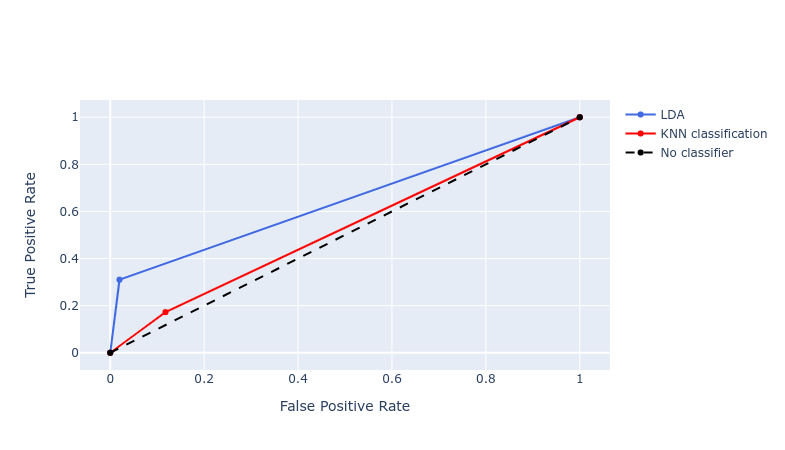

In [136]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_lda, 
                         y=tpr_lda, 
                         name='LDA',
                         line=dict(color='royalblue'))) 
fig.add_trace(go.Scatter(x=fpr_knnclass, 
                         y=tpr_knnclass, 
                         name='KNN classification',
                         line=dict(color='red'))) 
fig.add_trace(go.Scatter(x=[0,1], 
                         y=[0,1], 
                         name='No classifier',
                         line=dict(color='black', 
                                   dash='dash'))) 

fig.update_layout(
    xaxis=dict(title_text="False Positive Rate"),
    yaxis=dict(title_text="True Positive Rate"))
 
fig.show()